In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Zadanie 1

In [2]:
def rgb_to_hex(rgb: list[int]) -> str:
    """
    Convert an RGB list to its hexadecimal color representation.

    Args:
        rgb (list[int]): A list of three integers representing RGB values [R, G, B], 
                         where each value is in the range 0-255.

    Returns:
        str: The hexadecimal color representation of the RGB values, prefixed with '#'.
    """
    if len(rgb) != 3 or not all(0 <= value <= 255 for value in rgb):
        raise ValueError("Parametr rgb musi być trzy elemntową listą intów")
    return  "#{:02x}{:02x}{:02x}".format(*rgb)

## Przykład użycia: kwiatek

https://students.mimuw.edu.pl/~jw430620/polar_coords.html

In [3]:
def flower(c_leaf1, c_leaf2, c_center):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    theta = np.linspace(0, 2 * np.pi, 1000)
    r = 2 * np.sin(4 * theta)
    
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    
    ax.fill(x, y, color=c_leaf1, alpha=0.6)
    
    theta = np.linspace(0, 2 * np.pi, 1000)
    r = 2* np.sin(4 * theta + 45) * 0.9
    
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    
    ax.fill(x, y, color=c_leaf2, alpha=1)
    
    center = plt.Circle((0, 0), 0.25, color=c_center)
    ax.add_artist(center)
    
    # Customize the plot
    ax.set_aspect('equal', 'box') 
    ax.axis('off')
    
    # Show the detailed flower
    plt.title("Pokolorowany kwiatek ٩(^‿^)۶", fontsize=14)
    plt.show()

Podaj kolor większych liści: 120 240 80
Podaj kolor mniejszych liści: 240 90 20
Podaj kolor środka kwiatka: 150 170 20


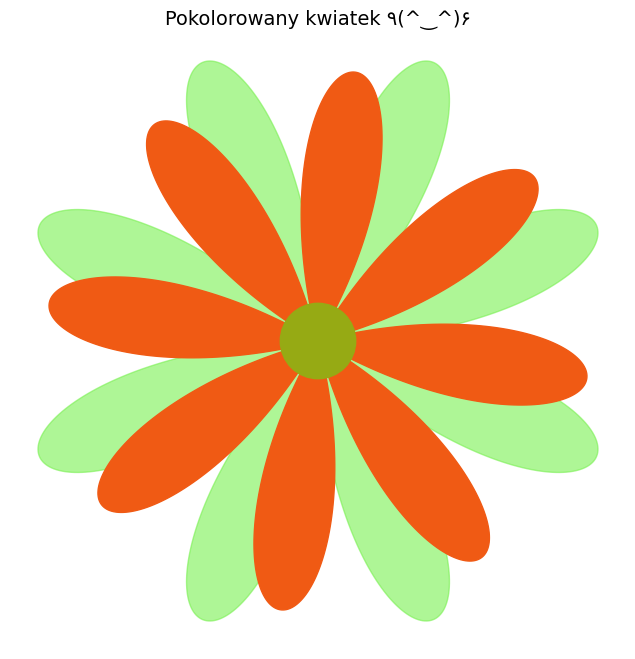

In [4]:
## print("Podaj kolory w formacie r g b")

leaf_1 = input("Podaj kolor większych liści:")
leaf_1 = leaf_1.split()  
leaf_1 = [int(num) for num in leaf_1]

leaf_2 = input("Podaj kolor mniejszych liści:")
leaf_2 = leaf_2.split()  
leaf_2 = [int(num) for num in leaf_2]

center = input("Podaj kolor środka kwiatka:")
center = center.split()  
center = [int(num) for num in center]
  

flower(rgb_to_hex(leaf_1), rgb_to_hex(leaf_2), rgb_to_hex(center))

# Zadanie 2

In [5]:
def hex_to_rgb(hex_color: str) -> tuple[int, int, int]:
    """
    Convert a hexadecimal color representation to its RGB tuple.

    Args:
        hex_color (str): A hexadecimal color representation, e.g., '#FFAABB'.

    Returns:
        tuple[int, int, int]: A tuple containing the RGB values as integers.

    Raises:
        ValueError: If the input is not a valid hexadecimal color.

    Example:
        >>> hex_to_rgb("#FFAABB")
        (255, 170, 187)
    """
    if not (isinstance(hex_color, str) and hex_color.startswith("#") and len(hex_color) == 7):
        raise ValueError("Argument musi być stringiem w formacie: '#RRGGBB'.")
    
    # Extract RGB components
    r = int(hex_color[1:3], 16)
    g = int(hex_color[3:5], 16)
    b = int(hex_color[5:7], 16)
    
    return r, g, b

## Przykład użycia: gradient

In [6]:
def generate_gradient(start_hex: str, end_hex: str, steps: int) -> np.ndarray:
    """
    Generate gradient between two colors.
    Args:
        start_hex (str): A hexidecimal representation of the first color in the gradient
        end_hex (str): A hexidecimal representation of the second color in the gradient
        steps (int): A number of steps in gradient (i.e. amount of colors in gradient)
    Returns:
        np.ndarray: A multi dimensional array containing RGB values for each step in the gradient.
    """
    start_rgb = np.array(hex_to_rgb(start_hex))
    end_rgb = np.array(hex_to_rgb(end_hex))

    diff = end_rgb - start_rgb
    
    gradient = np.zeros((steps, 3), dtype=int)
    for i in range(steps):
        gradient[i] = start_rgb + (diff * i) // (steps - 1)  # Oblicz każdy krok w gradientzie
    return gradient

In [7]:
def display_gradient(gradient: np.ndarray):
    """
    Display a color gradient as an image.
    Note: This function does not return any value. It only visualize the gradient as an image using 'matplotlib'.
    """
    plt.imshow([gradient],aspect='auto')
    plt.axis('off')  


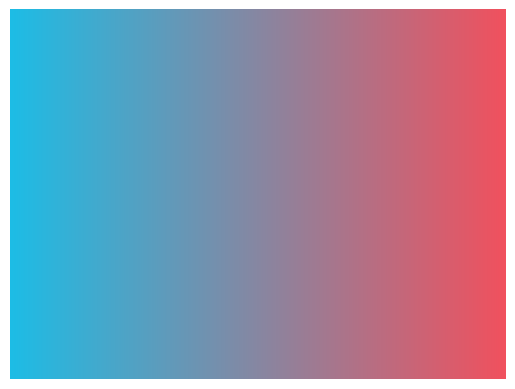

In [8]:
start_color = "#1dbde6"  # Kolor początkowy (hex)
end_color = "#f1515e"    # Kolor końcowy (hex)
steps = 1000             # Liczba kroków w gradientzie


gradient = generate_gradient(start_color, end_color, steps)

display_gradient(gradient)

# Zadanie 3 i 4


## Napiszmy kilka implementacji, aby sprawdzić złożoność czasową funkcji liczący n-ty wyraz ciągu Fibonnaciego:

### Wersja iteracyjna:
#### Złożoność czasowa: $ O(n) $
#### Złożoność pamięciowa $ O(1) $

In [9]:
def fib_iter(n):
    a, b = 0, 1
    sequence = []
    for _ in range(n-2):
        a, b = b, a + b
    return a + b

### Wersja reukurencyjna (bez memo):
#### Złożoność czasowa: $ 0(2^n) $
#### Złożoność pamięciowa: $ 0(n) $
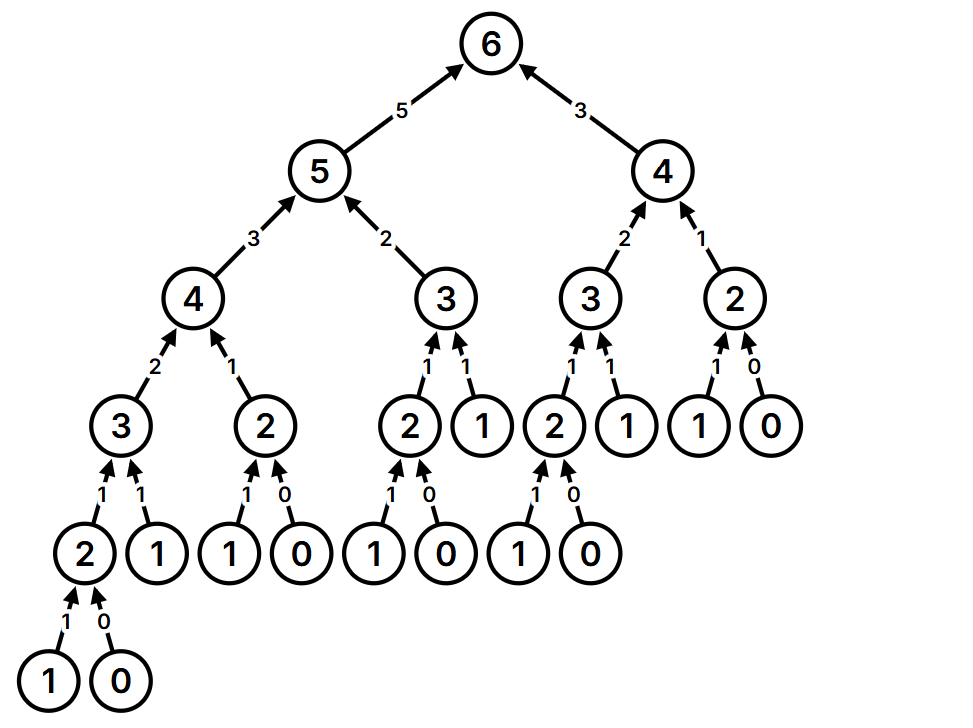

In [10]:
def fib_rec(n):
    if n <= 1:
        return n
    return fib_rec(n - 1) + fib_rec(n - 2)

### Wersja reukurencyjna (z memo):
#### Złożoność czasowa: $ O(n) $
#### Złożoność pamięciowa: $ O(n) $
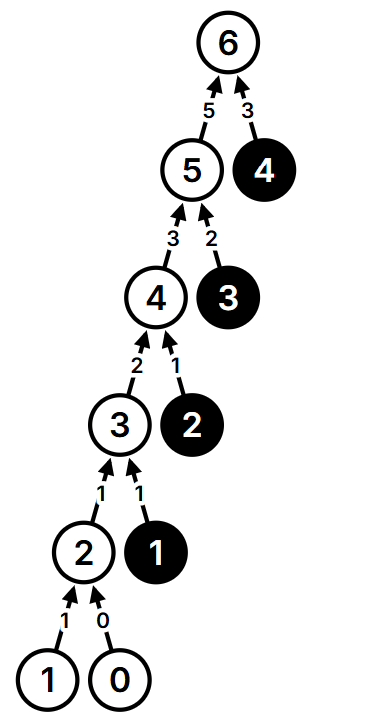

In [26]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fib_memo(n):
    if n <= 1:
        return n
    return fib_memo(n - 1) + fib_memo(n - 2)

### Narysujmy wkyres przedstawiający czas wykonywania powyższych algorytmów dla pewnego n:

In [12]:
n = 1000

iter_time = []
for i in range(0,n):
    start = time.perf_counter()
    fib_iter(i)
    iter_time.append(time.perf_counter()-start)

rec_memo_time = []
for i in range(0,n):
    start = time.perf_counter()
    fib_memo(i)
    rec_memo_time.append(time.perf_counter()-start)
    
n = 20

fib_rec_time = []
for i in range(0,n):
    start = time.perf_counter()
    fib_rec(i)
    fib_rec_time.append(time.perf_counter()-start)

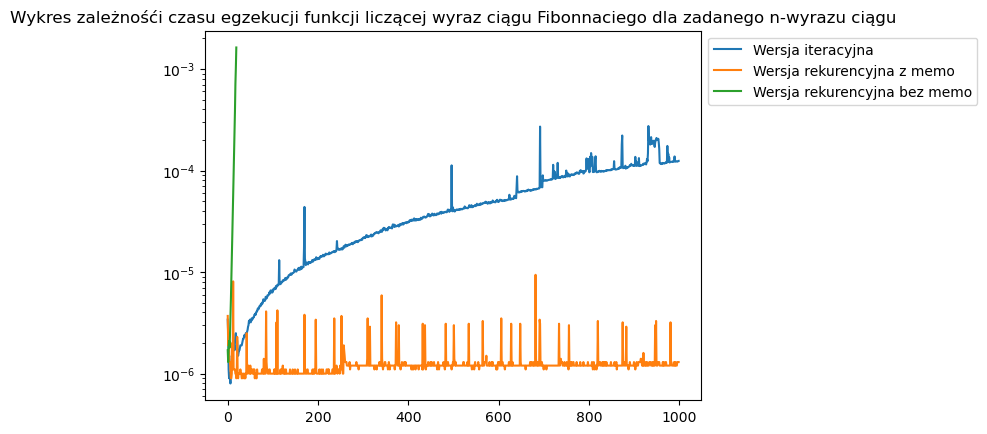

In [13]:
plt.plot(range(len(iter_time)), iter_time, label = "Wersja iteracyjna")
plt.plot(range(len(rec_memo_time)), rec_memo_time, label = "Wersja rekurencyjna z memo")
plt.plot(range(len(fib_rec_time)), fib_rec_time, label = "Wersja rekurencyjna bez memo")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Wykres zależnośći czasu egzekucji funkcji liczącej wyraz ciągu Fibonnaciego dla zadanego n-wyrazu ciągu")
plt.yscale('log')
plt.show()

#### Zwróćmy uwagę, że z wkresu wynika, że wersja rekurencyjna z memo ma złożoność czasową $ O(1) $. Wynika to jednak z tego, że gdy funkcja z memo wywołuje się dla pewnego przedziału $ (0,n) $ to w cache'u są przechowywane wszystkie wartośći tej funkcji z przedziału $ (0,n-1) $, więc wtedy rzeczywiście wykonuje się ona w czasie $ O(1) $. Jednak gdybyśmy wywołali tą funkcję po raz pierwszy (czyli z pustą pamięcią podręczną) dla dowolnego n to jej złożoność olbiczeniowa wynosi $ O(n) $.

### Sprawdźmy to:

Najpierw sprawdźmy co jest w pamięci podręcznej tej funkcji:

In [20]:
print(fib_memo.cache_info())

CacheInfo(hits=0, misses=2985, maxsize=None, currsize=0)


Powyżej możemy zauważyć, że obecna ilość wartości przechowywanych w pamięci podręcznej wynosi 1000, ilość odwołań do cache, które zwróciły wartośc funkcji wynosi 1997, a ilość odwołań do pamięci podręcznej, w których nie została zwrócona wartość dla zadanego n wynosi 1000. Te dane zgadzają się z kodem, który stworzylśmy do wygenerowania danych do wykresu. <br>
Usuńmy teraz zawartość pamięci podręcznej:

In [15]:
fib_memo.cache_clear()
fib_memo.cache_info()

CacheInfo(hits=0, misses=0, maxsize=None, currsize=0)

In [16]:
import sys

class recursionlimit:
    def __init__(self, limit):
        self.limit = limit

    def __enter__(self):
        self.old_limit = sys.getrecursionlimit()
        sys.setrecursionlimit(self.limit)

    def __exit__(self, type, value, tb):
        sys.setrecursionlimit(self.old_limit)

Sprawdźmy teraz czas wykonania funkcji w wersji iteracyjnej oraz rekurencyjnej z memo dla dowolnego n:

In [27]:
sys.setrecursionlimit(10**9)

start = time.perf_counter()
fib_iter(900)
end =  time.perf_counter() - start
print("Czas wykonania wersji iteracyjnej:", end)

start = time.perf_counter()
with recursionlimit(10000):
    fib_memo(2400)
end = time.perf_counter() - start
print("Czas wykonania wersji rekurencyjnej z memo:", end)

Czas wykonania wersji iteracyjnej: 0.00022760000138077885


RecursionError: maximum recursion depth exceeded

Możemy zauważyć, że czas wykonania wersji rekurencyjnej z memo jest nawet dłuższy. Wynika to z ciągłęgo odczytywania/zapisywania pamięci podręcznej oraz wywoływania rekurencyjnego funkcji. <br>
Oczywiśćie dla tak małych n-ów mogą występować anomalie (bo czasy egzekucji kodu są bardzo małe). <br>
Zatem rzeczywiście obie funkcje mają złożoność czasową $ O(n) $.

## Funkcje liczące n-wyrazów ciągu fibonnaciego:

### Wersja czystko rekurencyjna:

#### Złożoność czasowa: $ O(n) $

In [31]:
def fib_rec_seq(n):
    if n == 0:
        return [0]
    if n == 1:
        return [0,1]
    if n == 2:
        return [0,1,1]
        
    seq = fib_rec_seq(n-1)
    seq.append(seq[-1] + seq[-2])
    return seq

In [21]:
print(fib_rec_seq(5))

[0, 1, 1, 2, 3, 5]


### Wersja rekurencyjno-iteracyjna z memo:

#### Złożoność czasowa: $ O(n) $  czy $ O(n*n^2)  $ (!?)

### I sposób

In [28]:
def fib_rec_memo_seq_1(n):
    memo = {}

    def fib_rec_memo(i):
        if i in memo:
            return memo[i]
        if i <= 1:
            return i
        memo[i] = fib_rec_memo(i - 1) + fib_rec_memo(i - 2)
        return memo[i]

    return [fib_rec_memo(i) for i in range(n+1)]

In [23]:
print(fib_rec_memo_seq_1(5))

[0, 1, 1, 2, 3, 5]


### II sposób

In [29]:
def  fib_rec_memo_seq_2(n):
    return [fib_memo(i) for i in range(n+1)]

In [25]:
print(fib_rec_memo_seq_2(5))

[0, 1, 1, 2, 3, 5]


### Wersja czysto iteracyjna:

#### Złożoność czasowa: $ O(n) $

In [30]:
def fib_iter_seq(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]

    fib_sequence = [0, 1]
    for i in range(2, n+1):
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    return fib_sequence

In [27]:
print(fib_iter_seq(5))

[0, 1, 1, 2, 3, 5]


### Porównajmy czasy wykonania wszystkich funkcji dla pewnego n:

In [32]:
fib_memo.cache_clear()
fib_memo.cache_info()

CacheInfo(hits=0, misses=0, maxsize=None, currsize=0)

In [ ]:
n = 100000

start = time.perf_counter()
fib_rec_seq(n)
print("Wersja rekurencyjna:", time.perf_counter()-start)

start = time.perf_counter()
fib_rec_memo_seq_1(n)
end = time.perf_counter()-start
print("Wersja rekurencyjna z memo I sposób:", end)

start = time.perf_counter()
fib_rec_memo_seq_2(n)
end = time.perf_counter()-start
print("Wersja rekurencyjna z memo II sposób:", end)

start = time.perf_counter()
fib_iter(n)
end = time.perf_counter()-start
print("Wersja iteracyjna:", end)

Widzimy, że wersja iteracyjna jest naszybsza.
Jednak można zaimplementować jeszcze szybszą metodę - potęgowanie macierzy.
Wtedy $ O(log(n)) $


# Zadanie 5

In [30]:
def is_palindrome(word: str):
    for i in range(len(word)//2):
        if word[i].lower() != word[-i-1].lower():
            return False
    return True

In [31]:
is_palindrome("Żartem w metraż")

True

In [32]:
is_palindrome("Ala ma kota")

False

# Zadanie 6

In [33]:
def is_sorted(lst: list[int]):
    for i in range(len(lst)-1):
        if lst[i] >= lst[i+1]:
            return False
    return True

In [34]:
is_sorted([1,2,5,6,7])

True

In [35]:
is_sorted([1,2,5,6,5,7])

False

# Zadanie 7

In [36]:
def is_anagram(words: list[str]):
    for i in range(len(words)-1):
        if sorted(words[i].lower())!=sorted(words[i+1].lower()):
            return False
    return True

In [37]:
is_anagram(['Arbuz', 'Burza'])

True

In [38]:
is_anagram(['alergia' ,'algeria', 'galeria'])

True

In [39]:
is_anagram(['Kot', 'Koot'])

False